# CamVid review

In [1]:
import os
from abcli import file
from abcli.modules import objects
from abcli import fullname
from roofAI.semseg.utils import visualize
from IPython.display import Image
from abcli import string
from abcli.plugins import seed
import numpy as np

import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
abcli-7.2372.1-unknown, built on 14 October 2023, 16:09:31


In [2]:
dataset_object_name = "roofAI-CamVid-v2"
subset = "test"
index = 2

In [3]:
%%bash -s $dataset_object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

abcli download object $1

roofAI-CamVid-v2 open download started.
roofAI-CamVid-v2 download completed.


In [4]:
dataset_object_path = objects.path_of(
        "SegNet-Tutorial/CamVid/", 
        object_name=dataset_object_name
    )

In [5]:
mask_image = file.load_image(
            file.list_of(os.path.join(dataset_object_path,f"{subset}annot","*.png"))[index])[1][:,:,0]
np.unique(mask_image)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 11], dtype=uint8)

loaded 360x480x3:uint8 from /Users/kamangir/storage/abcli/roofAI-CamVid-v2/SegNet-Tutorial/CamVid/test/Seq05VD_f03270.png


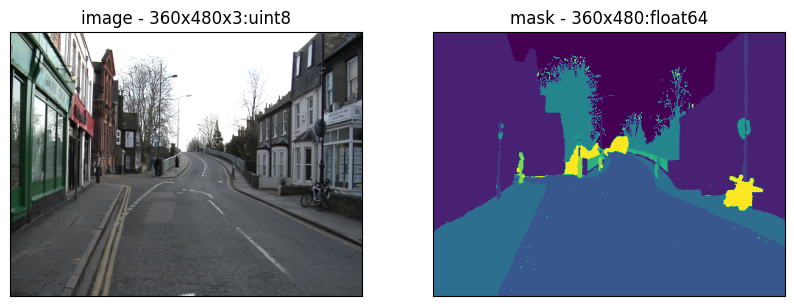

In [6]:
visualize(
    {
        "image": file.list_of(os.path.join(dataset_object_path,subset,"*.png"))[index],
        "mask": mask_image/np.max(mask_image),
    },
    in_notebook = True,
    description = [dataset_object_name, f"#{index}"])

In [7]:
seed.log(dataset_object_name)

abcli select roofAI-CamVid-v2; open .


In [8]:
# END